In [17]:
import math
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [18]:
def f(x):
    return 3*x*x -4*x + 5

In [19]:
f(3.0)

20.0

In [20]:
xs = np.arange(-5, 5, 0.25)

ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

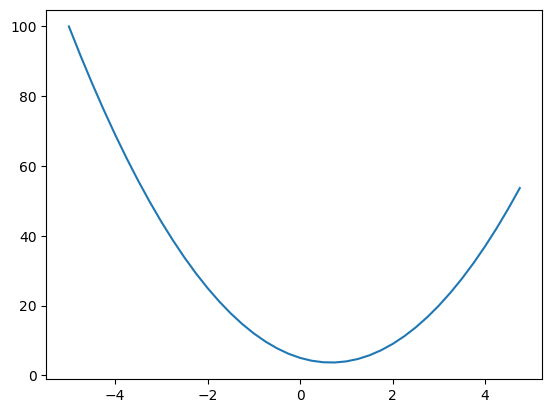

In [21]:
plt.plot(xs, ys)

In [22]:
h = 0.000001
x = 2/3 
diff = f(x+h) - f(x)
diff/h

2.999378523327323e-06

In [23]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [24]:
a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c

a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)

ddbyda = (d2-d1)/h
print('slope', ddbyda);


d1 4.0
d2 3.9999969999999996
slope -3.000000000419334


In [246]:
class Value: 
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self._backward = lambda: None
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data}, label={self.label}, grad={self.grad})"

    def __radd__(self, other):
        return self + other
        
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward
        return out

    def __sub__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return self + (other * -1)

    def __neg__(self):
        return self * -1
        
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self): 
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def __pow__(self, other):
        out = Value(self.data**other, (self, ), 'pow')
        def backward():
            self.grad += (other*(self.data**(other-1))) * out.grad
        out._backward = backward
        return out

    def backward(self):
        self.grad=1.0
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
    
        for node in reversed(topo):
            node._backward()
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c

d._prev
d._op




'+'

In [247]:
def lol():
    h = 0.0001
    
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e + c
    f = Value(-2.0)
    L = d*f; 
    L1 = L.data

    
    a = Value(2.0 + h)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e + c
    f = Value(-2.0)
    L = d*f; 
    L2 = L.data 

    print((L2 - L1) / h)
    
lol()

6.000000000021544


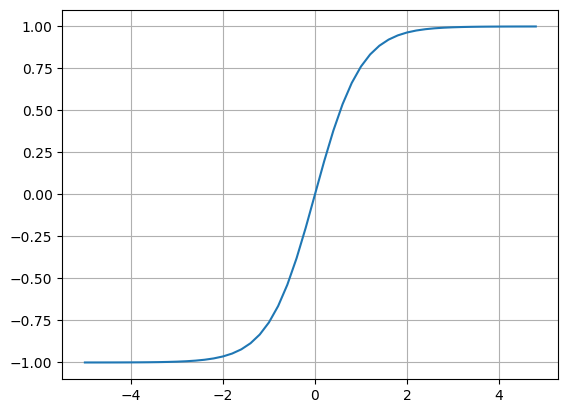

In [248]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();


In [249]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*/w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
o


Value(data=0.7071067811865476, label=o, grad=0.0)

In [250]:
o.grad=1.0
o.backward()
list = [x1, w1, x2, w2]
list

[Value(data=2.0, label=x1, grad=-1.4999999999999996),
 Value(data=-3.0, label=w1, grad=0.9999999999999998),
 Value(data=0.0, label=x2, grad=0.4999999999999999),
 Value(data=1.0, label=w2, grad=0.0)]

In [251]:
x2.grad

0.4999999999999999

In [533]:
import random

class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
        
    def __call__(self, x): 
        activationFunc = sum((self.w[i]*x[i] for i in range(len(x))), self.b)
        out = activationFunc.tanh()
        return out
        
    def parameters(self):
        return self.w + [self.b]
        

class Layer: 
    def __init__(self, dimension, num_neurons): 
        self.neurons = [Neuron(dimension) for _ in range(num_neurons)]

    def __call__(self, a): 
        outs = [n(a) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neu in self.neurons for p in neu.parameters()]
        
class MLP: 
    def __init__(self, dim, layer_list):
        num_layers = len(layer_list)
        sz = [dim] + layer_list
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(num_layers)]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
        
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

k = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(k)



Value(data=-0.09148587566412393, label=, grad=0.0)

In [534]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]
ypred


[Value(data=-0.09148587566412393, label=, grad=0.0),
 Value(data=0.06434792071224205, label=, grad=0.0),
 Value(data=0.6077664485591505, label=, grad=0.0),
 Value(data=0.04833013399326857, label=, grad=0.0)]

In [535]:
            
loss = sum([(ygotten - yneeded)**2 for yneeded, ygotten in zip(ys, ypred)])
loss


Value(data=5.814766400076526, label=, grad=0.0)

In [536]:

ypred = [n(x) for x in xs]
loss = sum([(ygotten - yneeded)**2 for yneeded, ygotten in zip(ys, ypred)])
loss

Value(data=5.814766400076526, label=, grad=0.0)

In [537]:
loss.backward()

In [538]:
ypred

[Value(data=-0.09148587566412393, label=, grad=-2.182971751328248),
 Value(data=0.06434792071224205, label=, grad=2.1286958414244843),
 Value(data=0.6077664485591505, label=, grad=3.215532897118301),
 Value(data=0.04833013399326857, label=, grad=-1.9033397320134628)]

In [539]:
n.layers[1].neurons[0].w

[Value(data=-0.532859466695726, label=, grad=-3.6089073337190865),
 Value(data=0.963419026999919, label=, grad=-0.6891632679275184),
 Value(data=-0.8435889972102839, label=, grad=1.481008710852315),
 Value(data=-0.25959843832562424, label=, grad=-3.1805118868071878)]

In [550]:
h = 0.01

for k in range(500): 
    ypred = [n(x) for x in xs]
    loss = sum([(ygotten - yneeded)**2 for yneeded, ygotten in zip(ys, ypred)])
    loss.backward()
    
    for p in n.parameters():
        p.data += -h * p.grad
        p.grad = 0.0
        
    print(k, loss.data)
    

0 0.0011666523786738416
1 0.0011660130380999915
2 0.0011653743772332833
3 0.0011647363950038829
4 0.001164099090344225
5 0.0011634624621889287
6 0.0011628265094748543
7 0.0011621912311410823
8 0.0011615566261288517
9 0.0011609226933816611
10 0.0011602894318451448
11 0.0011596568404671735
12 0.0011590249181977724
13 0.0011583936639891577
14 0.0011577630767956736
15 0.0011571331555739225
16 0.0011565038992825552
17 0.001155875306882458
18 0.0011552473773366336
19 0.0011546201096102222
20 0.001153993502670533
21 0.0011533675554869578
22 0.0011527422670310696
23 0.0011521176362765213
24 0.0011514936621990993
25 0.0011508703437766998
26 0.0011502476799893184
27 0.0011496256698190557
28 0.0011490043122501024
29 0.0011483836062687349
30 0.0011477635508633272
31 0.0011471441450243186
32 0.0011465253877442241
33 0.0011459072780176383
34 0.001145289814841184
35 0.0011446729972135702
36 0.001144056824135571
37 0.0011434412946099654
38 0.0011428264076416032
39 0.0011422121622373612
40 0.0011415985

In [548]:
n.layers[1].neurons[0].w

[Value(data=-0.06322453361811126, label=, grad=0.0),
 Value(data=0.9678911968301801, label=, grad=0.0),
 Value(data=-1.3917392740762753, label=, grad=0.0),
 Value(data=0.19116524451031836, label=, grad=0.0)]

In [551]:
ypred

[Value(data=0.9917829349876333, label=, grad=-0.016434130024733484),
 Value(data=-0.9933970854748954, label=, grad=0.013205829050209283),
 Value(data=-0.9800010077150629, label=, grad=0.039997984569874134),
 Value(data=0.9799126640361653, label=, grad=-0.040174671927669436)]